**CREDITOS OTORGADOS - PRODUBANCO (Grupos 2,4)**

En el ámbito financiero, la concesión de créditos es una de las actividades más importantes y a la vez, una de las más riesgosas para las instituciones. La capacidad de predecir y gestionar adecuadamente el riesgo crediticio es crucial para mantener la estabilidad financiera y minimizar las pérdidas. Este proyecto tiene como objetivo analizar el estatus de los créditos otorgados y determinar los factores que influyen en el incumplimiento de pago.
El análisis de datos históricos sobre la forma en que los créditos fueron otorgados y su posterior desempeño nos permitirá identificar patrones y tendencias en el comportamiento de los prestatarios. Con un enfoque centrado en la identificación de créditos que cayeron en vencimiento, este proyecto busca proporcionar una comprensión profunda de los factores que contribuyen a la morosidad.
**Tenemos datos completos de todos los préstamos emitidos entre 2007 y 2015, incluido el estado actual del préstamo (vigente, retrasado, totalmente pagado, etc.) y la última información de pago. Las características (también conocidas como variables) incluyen la puntuación crediticia, el número de consultas financieras, la dirección, incluidos los códigos postales y el estado, y los cobros, entre otros. El apartado de cobros indica si el cliente ha incumplido uno o más pagos y el equipo está intentando recuperar su dinero.
Produbanco, requiere del departamento de Business Intelligence analizar un grupo de creditos históricos. Asuma que el mes de análisis en marzo 2019 (fecha actual).**
Usted deberá cumplir con al menos los siguientes puntos:
Definición de mal pagador:
Crear una definición de ‘mal_pagador’. El dataset cuenta con varias columnas que hacen referencia los clientes que han tenido problemas de pagos. Analice y escoja una para crear la definición de mal pagador.
Ejemplo: Si supera mas de 15 dias vencido en x, mal pagador
Data quality:
Analice si existen valores duplicados, y si es así aborde el problema.
Analice si existen valores nulos, y si es así aborde el problema. Puede usar cualquiera de las alternativas que vimos en clase.
Si hay variables discretas que se encuentran como decimales, cámbielas a enteros. Por ejemplo, la edad en anos debe ser discreta.
Explore muy bien cuáles serían sus observaciones Válidas.
Feature transformation:
En este apartado usted deberá crear nuevas columnas apartir de las que tiene. Pueden ser:
Variables indicadores (1 si cumple x condición, 0 caso contrario)
Variables categóricas apartir de una variable nominal
Nuevas variables en funcion de otras, como por ejemplo ratios, vintage del cliente, etc..
Analisis correlacional:
Identifique si tiene variables correlacionadas
En caso de ser así, encuentre una explicación lógica para esa correlación. Si no encuentra un argumento, puede mencionarlo.
Análisis descriptivo:
Usando estatísticos descriptivos univariados, analice las variables que considere relevantes y aportan información.
Usando estatísticos descriptivos bivariados, analice las variables que considere relevantes y aportan información.
 Con variables categóricas, realice análisis con tablas cruzadas.
Es importante que cree preguntas de negocio y las responda cualquiera de los puntos 1,2,3. Por ejemplo:
Los clientes más jóvenes son los más riesgosos?
Los clientes más jóvenes que no tienen hijos, son más riesgosos?  
Es importante que siempre use su variable de interés(mal_pagador).
Por ejemplo: Los clientes que tienen mas de x años de vida son mas/menos propensos a ser malos pagadores …
	Es importante que use las variables que creó en Feature transformation
Es importante que use la mayor cantidad de visualizaciones posibles para los puntos     anteriores. Por ejemplo:
Diagrama de cajas y bigotes
Histogramas
Gráficos de dispersión
Gráficos pairplots
Conclusiones y Recomendaciones
En este apartado usted deberá sugerirle a la empresa a qué características tienen los clientes más riesgosos y cuáles podrían ser las futuras politicas de crédito para este producto. Además, de cómo se encuentra el sistema de cobranzas para los clientes con más problemas.

Entregables
Archivo notebook en donde se evidencie el desarrollo de cada uno de los puntos  que deberá subirse hasta enero 10 2024 en aula virtual.
Ppt o pdf que deberá subirse hasta el sábado 11. de enero en aula virtual.
BONUS: Los animamos a que creen un repositorio en github para su proyecto. No suban datos, solo el notebook y la presentación (ppt). Esto les permitirá ir construyendo su portafolio de proyectos.


#IMPORTACIÓN DE DATOS

In [1]:
#Autorizar acceso a Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [3]:
ruta='/content/drive/MyDrive/Colab Notebooks/BDA/Proyecto/creditos_historicos.csv'


In [4]:
data=pd.read_csv(ruta)

<ipython-input-4-256afd8ac4c4>:1: DtypeWarning: Columns (13,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(ruta)


In [5]:
data

,id_cliente,loan_status,loan_amnt,installment,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,next_pymnt_d,earliest_cr_line,mths_since_last_delinq,total_pymnt,recoveries,collection_recovery_fee,last_pymnt_d,settlement_status,application_type,tot_hi_cred_lim
0,0,Current,2500,84.92,36 months,Chef,10+ years,RENT,55000.0,Not Verified,...,Mar-2019,Apr-2001,NaN,167.020000,0.0,0.0,Feb-2019,NaN,Individual,60124.0
1,1,Current,30000,777.23,60 months,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,...,Mar-2019,Jun-1987,71.0,1507.110000,0.0,0.0,Feb-2019,NaN,Individual,372872.0
2,2,Current,5000,180.69,36 months,Administrative,6 years,MORTGAGE,59280.0,Source Verified,...,Mar-2019,Apr-2011,NaN,353.890000,0.0,0.0,Feb-2019,NaN,Individual,136927.0
3,3,Current,4000,146.51,36 months,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,...,Mar-2019,Feb-2006,NaN,286.710000,0.0,0.0,Feb-2019,NaN,Individual,385183.0
4,4,Current,30000,731.78,60 months,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,...,Mar-2019,Dec-2000,NaN,1423.210000,0.0,0.0,Feb-2019,NaN,Individual,157548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,2260663,Current,12000,279.72,60 months,house keeper,10+ years,MORTGAGE,58000.0,Not Verified,...,Mar-2019,Jan-2004,NaN,5360.960000,0.0,0.0,Feb-2019,NaN,Individual,73948.0
2260664,2260664,Fully Paid,12000,358.01,60 months,Skilled Labor,< 1 year,MORTGAGE,30000.0,Not Verified,...,NaN,Mar-2003,13.0,14499.802172,0.0,0.0,Aug-2018,NaN,Joint App,382275.0
2260665,2260665,Current,10000,332.10,36 months,Teacher,10+ years,OWN,64000.0,Source Verified,...,Mar-2019,Feb-1995,NaN,5306.940000,0.0,0.0,Feb-2019,NaN,Individual,203417.0
2260666,2260666,Current,12000,327.69,60 months,NaN,NaN,RENT,60000.0,Not Verified,...,Mar-2019,Jul-2003,7.0,5207.290000,0.0,0.0,Feb-2019,NaN,Individual,118975.0


# Data Quality



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id_cliente               int64  
 1   loan_status              object 
 2   loan_amnt                int64  
 3   installment              float64
 4   term                     object 
 5   emp_title                object 
 6   emp_length               object 
 7   home_ownership           object 
 8   annual_inc               float64
 9   verification_status      object 
 10  purpose                  object 
 11  addr_state               object 
 12  delinq_2yrs              float64
 13  next_pymnt_d             object 
 14  earliest_cr_line         object 
 15  mths_since_last_delinq   float64
 16  total_pymnt              float64
 17  recoveries               float64
 18  collection_recovery_fee  float64
 19  last_pymnt_d             object 
 20  settlement_status        object 
 21  applicat

### LIMPIEZA DE DATOS

In [8]:
data.isnull().sum()

,0
id_cliente,0
loan_status,0
loan_amnt,0
installment,0
term,0
emp_title,166969
emp_length,146907
home_ownership,0
annual_inc,4
verification_status,0


In [9]:
# Vamos a imnputar con la mediana en los valores faltante de tot_hi_cred_lim, para no afectar ya que pueden haber valores aberrantes
# Esto lo podemos ver en que el minimo valor es 0 y el max es 9999999
data[['tot_hi_cred_lim']].describe()
percentil_50 = data['tot_hi_cred_lim'].quantile(0.50)
data['tot_hi_cred_lim'] = data['tot_hi_cred_lim'].fillna(percentil_50)


In [11]:
# Ya que next_pymnt_d tiene mas del 75% de datos faltantes en esta columna, y por lo cual es preferible eliminar esta columna.
data = data.drop(columns=["next_pymnt_d"])

In [12]:
#Imputamos con el estado "sin problema" , ya que los clientes nulos quiere decir que el banco no ha tenido problemas con ellos.
data['settlement_status'] = data['settlement_status'].fillna('sin problema')

In [13]:
#Utilizamos lambda para poder imputar con la palabra "Garante", para los que no tenian profesion y tampoco años en un trabajo
data['emp_title'] = data.apply(lambda row: 'Garante' if pd.isnull(row['emp_title']) and pd.isnull(row['emp_length']) else row['emp_title'], axis=1)

In [14]:
#Utilizamos lambda para poder imputar con la palabra "Garante", para los que no tenian profesion y tampoco años en un trabajo
data['emp_length'] = data.apply(lambda row: 'Garante' if row['emp_title']== 'Garante' and pd.isnull(row['emp_length']) else row['emp_length'], axis=1)

In [15]:
# en las filas de la variable emp_title  si hay valores nulos llena con MA (menos de un año),
# cuando emp_length es < 1 year , y si emp_length es mayor a 1 año coloca con no info.
data['emp_title'] = data.apply(lambda row: '< 1 year' if pd.isnull(row['emp_title']) and row['emp_length'] == '< 1 year' else ('No Info' if pd.isnull(row['emp_title']) and row['emp_length'] != '< 1 year' else row['emp_title']), axis=1)

In [16]:
#Haremos drop de estas filas porque tienen nulos por el mismo codigo de clientes.
data = data.dropna(subset=['delinq_2yrs', 'earliest_cr_line'])

In [17]:
#Imputamos cero en null de mths_since_last_delinq si delinq_2yrs es cero, no ha caido en mora, y con la mediana si es que delinq_2yrs es diferente de cero.
median_mths_since_last_delinq = data['mths_since_last_delinq'].median()
# Use a lambda function to fill missing values in 'mths_since_last_delinq'
data['mths_since_last_delinq'] = data.apply(lambda row: 0 if pd.isnull(row['mths_since_last_delinq']) and row['delinq_2yrs'] == 0 else (median_mths_since_last_delinq if pd.isnull(row['mths_since_last_delinq']) and row['delinq_2yrs'] != 0 else row['mths_since_last_delinq']), axis=1)

In [18]:
#imputamos con la moda
mode_emp_length = data['emp_length'].mode()[0]

# Fill missing values in 'emp_length' with the mode
data['emp_length'] = data['emp_length'].fillna(mode_emp_length)

In [20]:
#En la columna "last_pymnt_d" cuando en esa fila exista valor faltante y que en la columna loan status dice chargged off, eliminala esa fila del dataset
data = data[~((data['last_pymnt_d'].isnull()) & (data['loan_status'] == 'Charged Off'))]

In [21]:
#No encontramos razon para justificar los faltantes, y al ser pocos datos en comparacion a la data total. decidimos eliminarlos.
data = data.dropna(subset=['last_pymnt_d'])

In [22]:
def cat(valor):
  if valor <= 2.0 :
    return "Bajo"
  elif valor <=24.0 :
    return "Alto"
  else:
    return "Erroneo"

In [23]:
data['retrasos']=data['delinq_2yrs'].apply(lambda x: cat(x))
data['retrasos'].value_counts()

,count
retrasos,
Bajo,2199410
Alto,58786
Erroneo,17


In [24]:
# Eliminar filas donde 'retrasos' es "Erroneo"
data = data[data['retrasos'] != 'Erroneo']

In [25]:
data['retrasos'].value_counts()

,count
retrasos,
Bajo,2199410
Alto,58786


#Definiendo al Mal Pagador


In [26]:
def cat2(valor):
  if valor in ('Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)', 'Default'): # Use 'in' to check if valor is in the tuple
    return "Categoria 2"
  else:
    return "Categoria 1"

In [27]:
data['categoria']=data['loan_status'].apply(lambda x: cat2(x))

In [28]:
data['categoria'].value_counts()

,count
categoria,
Categoria 1,1976284
Categoria 2,281912


**Data total: 2260668 Procedemos a limpiar la data,consideramos a los categoria 2 , 281912 como malos clientes.

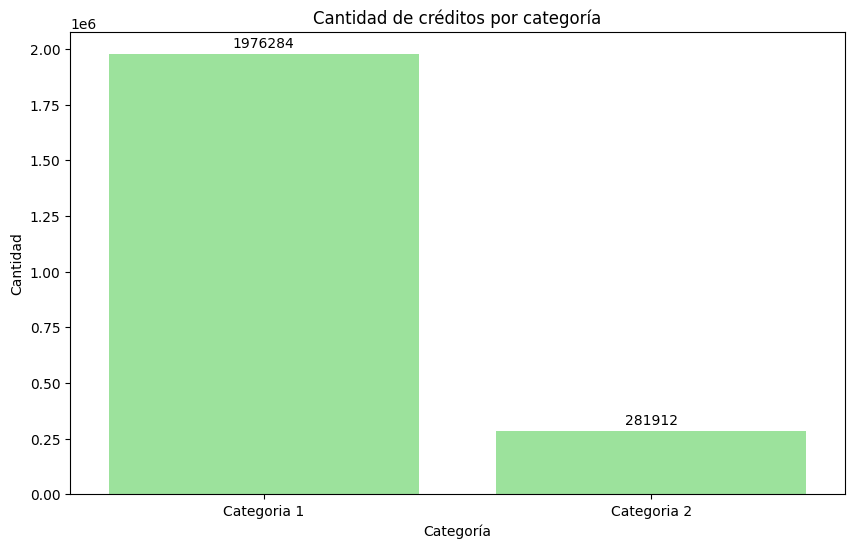

In [75]:
# prompt: Genera un grafico de barras usando data, la variable categoria , usa color verde pastel para el relleno de las barras, añade las cantidades de cada categoria dentro de cada barra

import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'categoria' es una columna en tu DataFrame 'data'
categoria_counts = data['categoria'].value_counts()

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=categoria_counts.index, y=categoria_counts.values, color="lightgreen")

# Agregar las cantidades dentro de cada barra
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.title("Cantidad de créditos por categoría")
plt.show()

### Categoria de Ingresos en base a Annual Income

In [30]:
# Calculate quartiles for annual_inc
first_quartile = data['annual_inc'].quantile(0.25)
second_quartile = data['annual_inc'].quantile(0.50)
third_quartile = data['annual_inc'].quantile(0.75)

# Create the new 'income_category' column using a lambda function
data['cat_ingresos'] = data['annual_inc'].apply(lambda x: 'INGRESOS BAJOS' if x < first_quartile else ('INGRESO MEDIO' if x < second_quartile else ('INGRESO ALTO' if x > third_quartile else 'INGRESO MEDIO')))

In [31]:
print(first_quartile)
print(second_quartile)
print(third_quartile)

46000.0
65000.0
93000.0


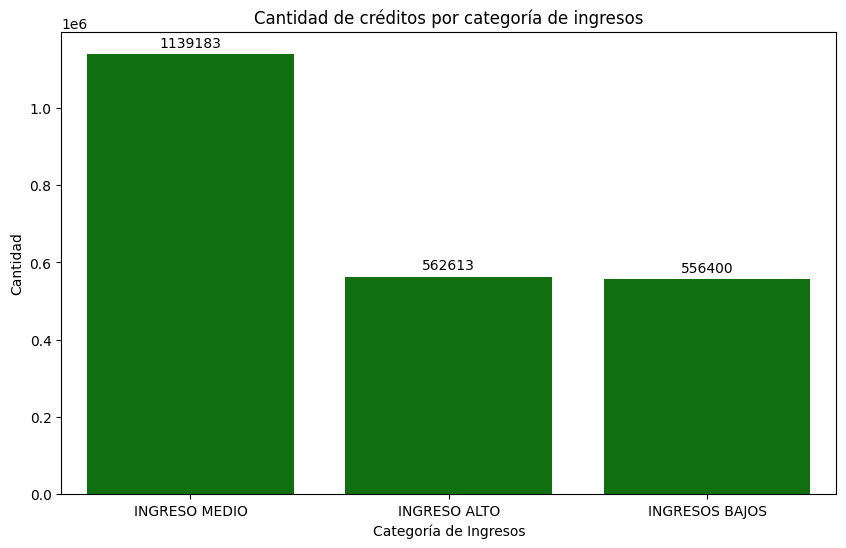

In [76]:
# prompt: Genera un grafico de barras usando data, la variable cat_ingresos, usa color verde pastel para el relleno de las barras, añade las cantidades de cada cat_ingresos dentro de cada barra

# Suponiendo que 'cat_ingresos' es una columna en tu DataFrame 'data'
cat_ingresos_counts = data['cat_ingresos'].value_counts()

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=cat_ingresos_counts.index, y=cat_ingresos_counts.values, color="green")

# Agregar las cantidades dentro de cada barra
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Categoría de Ingresos")
plt.ylabel("Cantidad")
plt.title("Cantidad de créditos por categoría de ingresos")
plt.show()

#Analisis correlacional:

Identifique si tiene variables correlacionadas
En caso de ser así, encuentre una explicación lógica para esa correlación. Si no encuentra un argumento, puede mencionarlo.


In [72]:
# Calcular la matriz de correlación
correlation_matrix = data[["loan_amnt","installment","annual_inc","delinq_2yrs","tot_hi_cred_lim","mths_since_last_delinq","total_pymnt","recoveries","collection_recovery_fee",]].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                         loan_amnt  installment  annual_inc  delinq_2yrs  \
loan_amnt                 1.000000     0.945625    0.197169    -0.009338   
installment               0.945625     1.000000    0.190205     0.002069   
annual_inc                0.197169     0.190205    1.000000     0.026269   
delinq_2yrs              -0.009338     0.002069    0.026269     1.000000   
tot_hi_cred_lim           0.333874     0.298302    0.263919     0.058298   
mths_since_last_delinq   -0.021224    -0.013375    0.012555    -0.068907   
total_pymnt               0.651883     0.650973    0.136715     0.015776   
recoveries                0.120675     0.118311    0.009744     0.016528   
collection_recovery_fee   0.115327     0.113294    0.009831     0.016864   

                         tot_hi_cred_lim  mths_since_last_delinq  total_pymnt  \
loan_amnt                       0.333874               -0.021224     0.651883   
installment                     0.298302               -0.013375     0.650973

1.  Installment y loanamnt ( 0.94 ) - Numero de cuotas y monto del prestamo, mientras mayor sea el monto prestado, mayor van a ser las cuotas a pagar.Tiene sentido en base a los plazos de pago

2.  Total_pymnt y loan_amnt ( 0.64 ) - Pago de la cuota y monto del prestamo, esto hay que analizarlo con un grafico, pero si tenemos altos montos prestados, asi mismo tendremos valores pagados totales.

3.  Total_pymnt y installment ( 0.62) - Pago de la cuota del proveedor y numero de cuotas. Entre mayor sean las cuotas de pago, mayor la cantidad total pagada.

4.  Collection_recovery_fee y recoveries ( 0.9731 ) Si es mayor el monto recuperado del prestamo, asi mismo sera el impuesto o costo por recuperar ese valor.



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


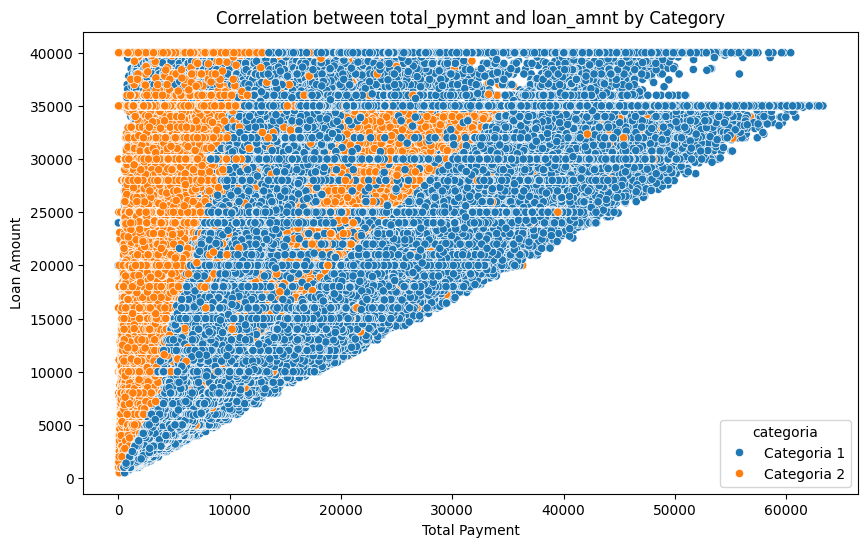

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_pymnt', y='loan_amnt', hue='categoria', data=data)
plt.title('Correlation between total_pymnt and loan_amnt by Category')
plt.xlabel('Total Payment')
plt.ylabel('Loan Amount')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


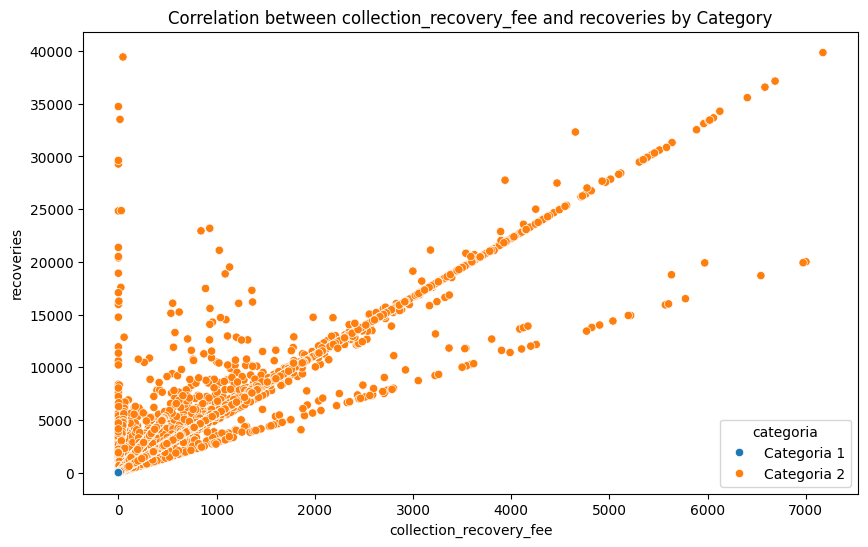

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='collection_recovery_fee', y='recoveries', hue='categoria', data=data)
plt.title('Correlation between collection_recovery_fee and recoveries by Category')
plt.xlabel('collection_recovery_fee')
plt.ylabel('recoveries')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


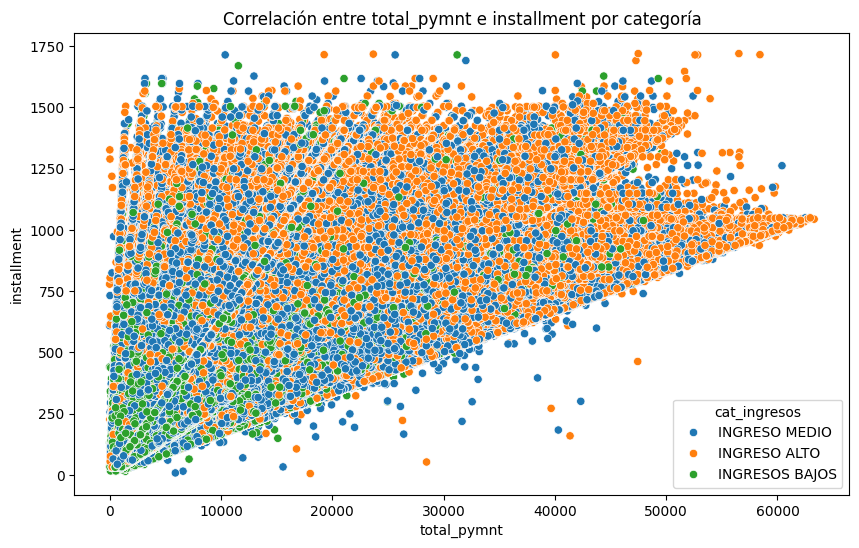

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_pymnt', y='installment', hue='cat_ingresos', data=data)
plt.title('Correlación entre total_pymnt e installment por categoría')
plt.xlabel('total_pymnt')
plt.ylabel('installment')
plt.show()

In [ ]:
correlation_matrix = data[["delinq_2yrs","annual_inc"]].corr()
print(correlation_matrix)

             delinq_2yrs  annual_inc
delinq_2yrs     1.000000    0.026269
annual_inc      0.026269    1.000000


In [ ]:
correlation_matrix = data[["loan_amnt","installment",]].corr()
print(correlation_matrix)

             loan_amnt  installment
loan_amnt     1.000000     0.945625
installment   0.945625     1.000000


In [66]:
correlation_matrix = data[["loan_amnt","total_pymnt",]].corr()
print(correlation_matrix)

             loan_amnt  total_pymnt
loan_amnt     1.000000     0.651883
total_pymnt   0.651883     1.000000


In [71]:
correlation_matrix = data[["collection_recovery_fee","recoveries",]].corr()
print(correlation_matrix)

                         collection_recovery_fee  recoveries
collection_recovery_fee                 1.000000    0.971112
recoveries                              0.971112    1.000000


#Análisis descriptivo:
      

In [32]:
pd.crosstab(data['emp_title'], data['categoria'], normalize="index").sort_values(by='Categoria 2', ascending=False)*100

categoria,Categoria 1,Categoria 2
emp_title,,
PHENIX MUTUAL FIRE INSURANCE CO,0.0,100.0
VP Chief Human Resources Officer,0.0,100.0
Cut/grinding operator,0.0,100.0
Lead Corporate Advisor,0.0,100.0
Cut saw,0.0,100.0
...,...,...
Hosptial Housekeeping Sytems,100.0,0.0
Hosptial Director,100.0,0.0
Hosptal Services Tech II,100.0,0.0


según la tabla las probabilidades de que los trabajan en PHENIX MUTUAL FIRE INSURANCE Co( compañía de seguros), sea vicepresidente de recursos humanos y operador de cortes industriales sean malos pagadores es del 100%

In [33]:
#emplength y categoria
pd.crosstab(data['emp_length'], data['categoria'],normalize='index').sort_values(by='Categoria 2', ascending=False)*100

categoria,Categoria 1,Categoria 2
emp_length,,
Garante,84.953210,15.046790
8 years,86.312338,13.687662
9 years,86.729290,13.270710
7 years,86.952436,13.047564
1 year,87.051490,12.948510
3 years,87.472721,12.527279
2 years,87.541594,12.458406
5 years,87.596227,12.403773
6 years,87.613538,12.386462


Analizando los datos, los clientes que hayan solicitado un prestamo con Garante tienen un probabilidad del 15.04% de ser malos pagadores,representando el riesgo más alto.Seguidos por antigüedad laboral de 8 years, 9 years, y 7 years.

In [ ]:
pd.crosstab(data['application_type'], data['categoria'],normalize='index').sort_values(by='Categoria 2', ascending=False)*100

categoria,Categoria 1,Categoria 2
application_type,,
Individual,87.176135,12.823865
Joint App,93.542047,6.457953


Los clientes que solicitan prestamos en individuales tienen una mayor probabilidad de que caer en morosidad con 12% sobre el 6% de las solicitudes grupales

In [ ]:
pd.crosstab(data['cat_ingresos'], data['categoria'],normalize='index').sort_values(by='Categoria 2', ascending=False)*100

categoria,Categoria 1,Categoria 2
cat_ingresos,,
INGRESOS BAJOS,85.301941,14.698059
INGRESO MEDIO,87.234536,12.765464
INGRESO ALTO,90.275731,9.724269


Los clientes con ingresos bajos (ingreso anual hasta USD 46000.0) son más propensos a ser malos pagadores con una probabilidad de 15%

In [ ]:
# Tablas cruzadas entre las variables categóricas
categorical_vars = ['loan_status', 'verification_status', 'term', 'addr_state', 'categoria']

def create_crosstabs(data, variables):
    for i in range(len(variables)):
        for j in range(i + 1, len(variables)):
            print(f"\nCrosstab entre {variables[i]} y {variables[j]}")
            crosstab = pd.crosstab(data[variables[i]], data[variables[j]], normalize='index')  # Normalizar por filas
            print(crosstab * 100)

create_crosstabs(data, categorical_vars)

## Variables numericas.






## Revision de Annual_inc

count    3.106910e+05
mean     7.342047e+04
std      6.771475e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.200000e+04
75%      8.800000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

Number of outliers in 'annual_inc': 14052

Outliers:
680        385000.0
770        210000.0
1614       221000.0
2413       165000.0
2602       215000.0
             ...   
2258855    720000.0
2259645    207000.0
2259783    165000.0
2260091    300000.0
2260130    188000.0
Name: annual_inc, Length: 14052, dtype: float64


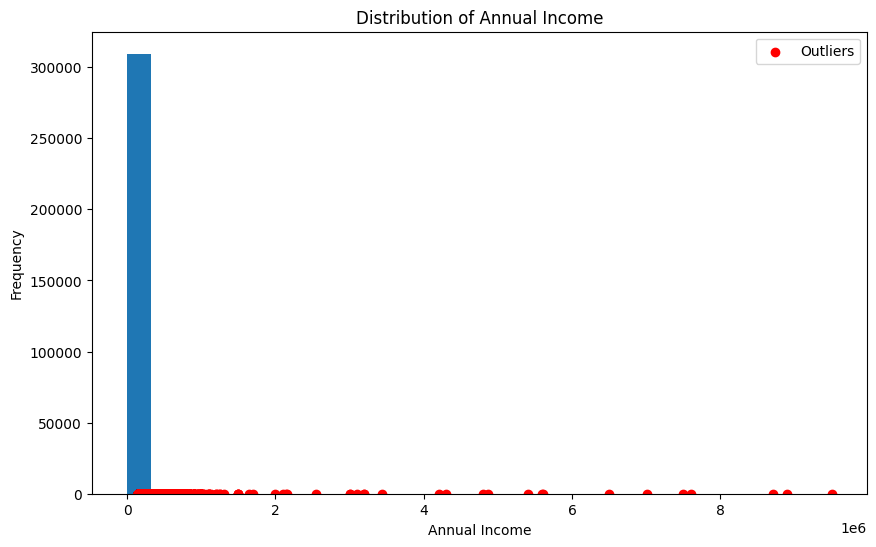

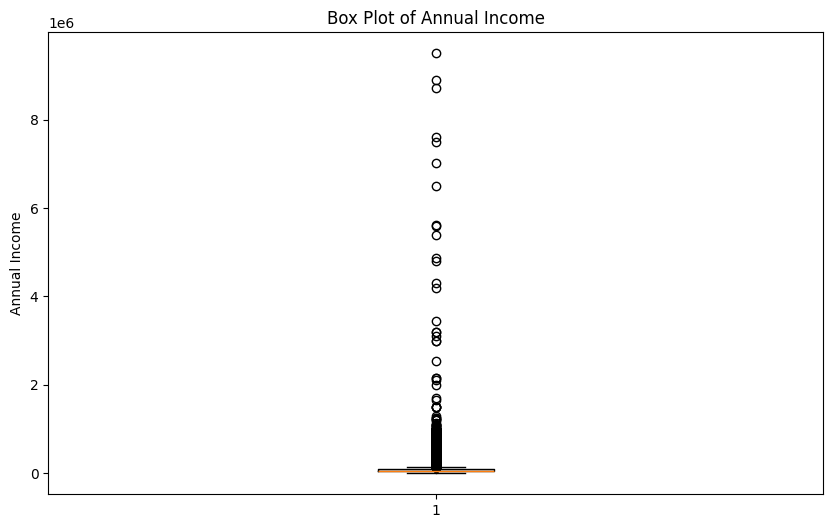

In [ ]:
# prompt: Quiero revisar los valores aberrantes de la variable annual_inc en dataset malospagadores

# Calculate descriptive statistics for 'annual_inc'
annual_inc_description = data['annual_inc'].describe()
print(annual_inc_description)

# Identify outliers using the IQR method
Q1 = data['annual_inc'].quantile(0.25)
Q3 = data['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['annual_inc'] < lower_bound) | (data['annual_inc'] > upper_bound)]
print("\nNumber of outliers in 'annual_inc':", len(outliers))
print("\nOutliers:")
print(outliers['annual_inc'])

# Visualize the distribution of 'annual_inc' with outliers highlighted
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['annual_inc'], bins=30)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Highlight outliers
plt.scatter(outliers['annual_inc'], [1] * len(outliers), color='red', label='Outliers')
plt.legend()
plt.show()

# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
plt.boxplot(malospagadores['annual_inc'])
plt.title('Box Plot of Annual Income')
plt.ylabel('Annual Income')
plt.show()

In [ ]:
data['annual_inc'].value_counts()

,count
annual_inc,
60000.00,12717
50000.00,11061
65000.00,9275
40000.00,8876
70000.00,8743
...,...
50233.12,1
75553.00,1
31575.00,1


In [ ]:
data['categoria'].value_counts()

,count
categoria,
Categoria 1,9231
Categoria 2,4821


In [ ]:
outcat2 = data[data['categoria'] == 'Categoria 1']
outcat2['emp_title'].value_counts()
#empleo = outcat2[outcat2['emp_title']=='Packing Operator']
#empleo

,count
emp_title,
Owner,261
Director,175
President,169
Vice President,148
No Info,144
...,...
"ceo,trader",1
Professor/Dean,1
Sr Systems Administrator,1


In [ ]:
outcat2 = outliers_dataset[outliers_dataset['categoria'] == 'Categoria 2']
outcat2['emp_title'].value_counts()
empleo = outcat2[(outcat2['emp_title']=='Director') & (outcat2['delinq_2yrs']==3)]
empleo
#empleo['delinq_2yrs'].value_counts()

,id_cliente,loan_status,loan_amnt,installment,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,earliest_cr_line,mths_since_last_delinq,total_pymnt,recoveries,collection_recovery_fee,last_pymnt_d,settlement_status,application_type,tot_hi_cred_lim,categoria
34832,34832,Current,35000,1099.85,36 months,Director,8 years,RENT,280000.0,Not Verified,...,Nov-2005,7.0,2238.77,0.0,0.0,Feb-2019,sin problema,Individual,63145.0,Categoria 2
68301,68301,Current,28000,951.01,36 months,Director,10+ years,MORTGAGE,165000.0,Not Verified,...,Feb-2004,8.0,2916.32,0.0,0.0,Feb-2019,sin problema,Individual,401833.0,Categoria 2
68685,68685,Current,36000,707.26,60 months,Director,5 years,OWN,300000.0,Verified,...,Aug-2002,20.0,2108.44,0.0,0.0,Feb-2019,sin problema,Individual,283593.0,Categoria 2
115455,115455,Current,9000,329.64,36 months,Director,10+ years,MORTGAGE,350000.0,Source Verified,...,Sep-2000,8.0,1309.09,0.0,0.0,Feb-2019,sin problema,Individual,633804.0,Categoria 2
136934,136934,Current,35000,1264.81,36 months,Director,3 years,MORTGAGE,198000.0,Source Verified,...,Mar-1998,18.0,6289.11,0.0,0.0,Feb-2019,sin problema,Individual,264088.0,Categoria 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193056,2193056,Current,35000,1120.18,36 months,Director,10+ years,OWN,450000.0,Verified,...,Oct-1992,11.0,16775.17,0.0,0.0,Feb-2019,sin problema,Individual,1928783.0,Categoria 2
2218362,2218362,Current,18000,406.07,60 months,Director,2 years,MORTGAGE,190000.0,Verified,...,Aug-2004,8.0,6071.49,0.0,0.0,Feb-2019,sin problema,Individual,634002.0,Categoria 2
2247164,2247164,Current,32000,1189.24,36 months,Director,2 years,RENT,166071.0,Verified,...,Mar-1999,4.0,18992.28,0.0,0.0,Feb-2019,sin problema,Individual,158174.0,Categoria 2
2250638,2250638,Current,10000,322.35,36 months,Director,7 years,OWN,324000.0,Not Verified,...,May-1991,9.0,5177.15,0.0,0.0,Feb-2019,sin problema,Individual,632025.0,Categoria 2


In [ ]:
outliers_dataset[['categoria','id_cliente']].value_counts()

categoria    id_cliente
Categoria 1  90907         1
             1746431       1
             1740917       1
             1740961       1
             1741126       1
                          ..
             1033536       1
             1033587       1
             1033594       1
             1033601       1
Categoria 2  2260406       1
Name: count, Length: 13452, dtype: int64

In [ ]:
# prompt: Elimina usando el codigo anterior los valores aberrantes de annual inc

# Assuming 'malospagadores' DataFrame is already defined as in the previous code.

# Remove outliers from 'annual_inc' using IQR method
Q1 = malospagadores['annual_inc'].quantile(0.25)
Q3 = malospagadores['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
malospagadores_no_outliers = malospagadores[
    (malospagadores['annual_inc'] >= lower_bound) & (malospagadores['annual_inc'] <= upper_bound)
]

# Print the number of outliers removed
num_outliers_removed = len(malospagadores) - len(malospagadores_no_outliers)
print(f"Number of outliers removed from 'annual_inc': {num_outliers_removed}")

# Now 'malospagadores_no_outliers' contains the data without the outliers in 'annual_inc'
# You can continue your analysis using this DataFrame.

# Example: Display the descriptive statistics of 'annual_inc' after outlier removal
print("\nDescriptive statistics of 'annual_inc' after outlier removal:")
print(malospagadores_no_outliers['annual_inc'].describe())

Number of outliers removed from 'annual_inc': 0

Descriptive statistics of 'annual_inc' after outlier removal:
count    296639.000000
mean      65943.654392
std       29397.015142
min           0.000000
25%       44200.000000
50%       60000.000000
75%       83200.000000
max      152500.000000
Name: annual_inc, dtype: float64


## Analisis Variables Numericas

In [ ]:
# Análisis univariado para mths_since_last_delinq y tot_hi_cred_lim

def univariate_analysis(data, variables):
    for var in variables:
        print(f"\nAnálisis univariado para: {var}")
        print(data[var].describe())

        # Histograma
        plt.figure(figsize=(8, 4))
        data[var].plot(kind='hist', bins=30, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f"Histograma de {var}")
        plt.xlabel(var)
        plt.ylabel('Frecuencia')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # Boxplot
        plt.figure(figsize=(6, 4))
        data.boxplot(column=var)
        plt.title(f"Boxplot de {var}")
        plt.ylabel(var)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

variables_numericas = ['mths_since_last_delinq', 'tot_hi_cred_lim']
univariate_analysis(data, variables_numericas)

In [ ]:
#Analisis Bivariado

# Correlación entre variables numéricas
def bivariate_analysis(data, num_vars, cat_vars):
    print("\nAnálisis bivariado: Correlaciones entre variables numéricas")
    print(data[num_vars].corr())

    # Scatter plots entre variables numéricas
    for i in range(len(num_vars)):
        for j in range(i + 1, len(num_vars)):
            plt.figure(figsize=(8, 4))
            plt.scatter(data[num_vars[i]], data[num_vars[j]], alpha=0.5, color='green')
            plt.title(f"Scatter plot entre {num_vars[i]} y {num_vars[j]}")
            plt.xlabel(num_vars[i])
            plt.ylabel(num_vars[j])
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.show()
 # Distribuciones entre variables numéricas y categóricas
    for num_var in num_vars:
        for cat_var in cat_vars + ['categoria']:
            plt.figure(figsize=(10, 6))
            data.boxplot(column=num_var, by=cat_var, grid=False)
            plt.title(f"{num_var} por {cat_var}")
            plt.suptitle("")
            plt.xlabel(cat_var)
            plt.ylabel(num_var)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.xticks(rotation=45, ha='right')  # Función que nos ayuda a rotar etiquetas del eje x para mejor legibilidad
            plt.show()



num_vars = ['mths_since_last_delinq', 'tot_hi_cred_lim']
cat_vars = ['loan_status', 'verification_status', 'term', 'addr_state']
bivariate_analysis(data, num_vars, cat_vars)

In [34]:
data[["loan_amnt","annual_inc"]].describe().round(2)

,loan_amnt,annual_inc
count,2258196.00,2.258196e+06
mean,15047.18,7.799615e+04
std,9188.71,1.127418e+05
min,500.00,0.000000e+00
25%,8000.00,4.600000e+04
50%,12925.00,6.500000e+04
75%,20000.00,9.300000e+04
max,40000.00,1.100000e+08


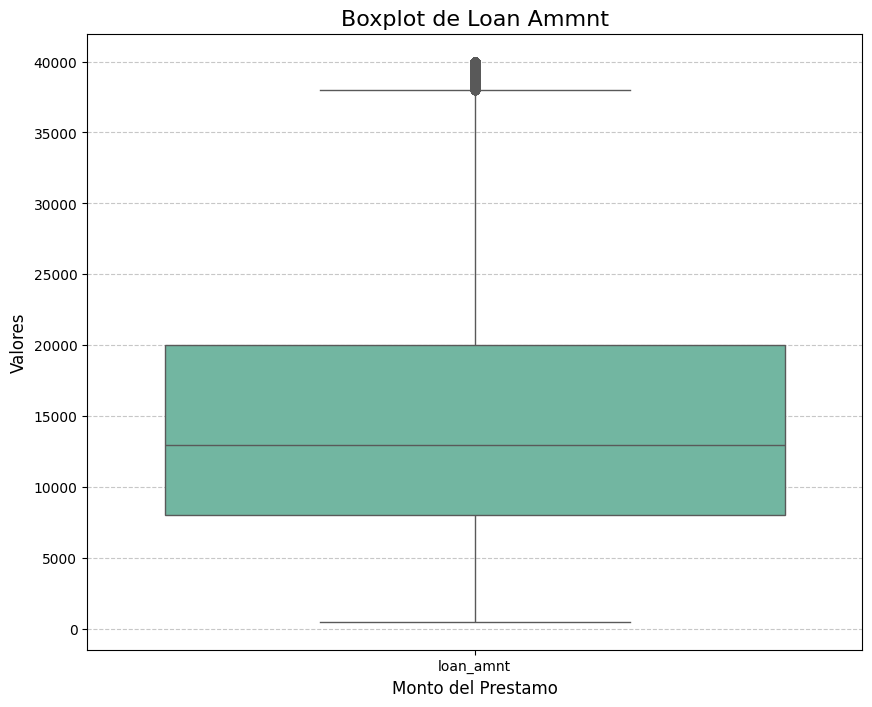

In [58]:
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.boxplot(data=data[["loan_amnt"]], palette="Set2")  # Crear el boxplot con seaborn

# Personalización del gráfico
plt.title("Boxplot de Loan Ammnt", fontsize=16)
#plt.xlabel("Variables", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.xlabel("Monto del Prestamo", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Agregar líneas de referencia horizontales

# Mostrar el gráfico
plt.show()

El boxplot muestra la distribución de las cantidades de préstamos otorgados por el banco. La mediana se encuentra cerca de los  USD 10,000. El 50% de los prestamos abarca desde aproximadamente  USD 8,000 hasta USD 20,000. Sin embargo, se observan valores atípicos que superan los USD 40,000, estos podrian ser préstamos excepcionales significativamente mayores al promedio

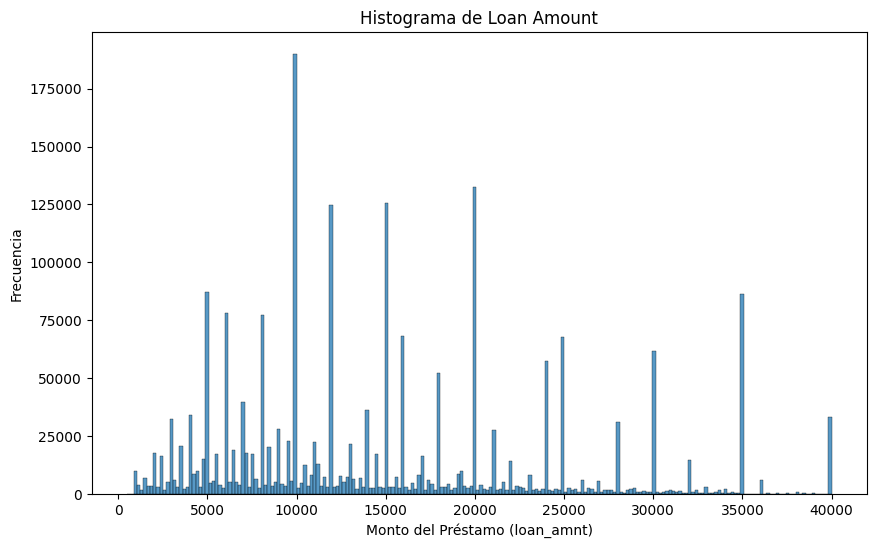

In [36]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['loan_amnt'])  # Use seaborn's histplot for better aesthetics
plt.title('Histograma de Loan Amount')
plt.xlabel('Monto del Préstamo (loan_amnt)')
plt.ylabel('Frecuencia')
plt.show()

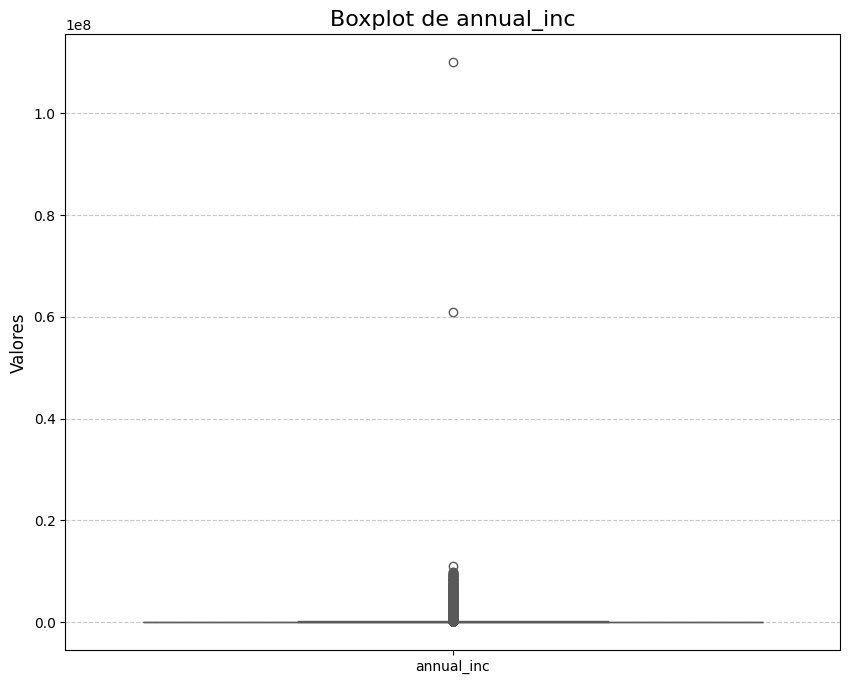

In [37]:
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.boxplot(data=data[["annual_inc"]], palette="Set2")  # Crear el boxplot con seaborn

# Personalización del gráfico
plt.title("Boxplot de annual_inc", fontsize=16)
#plt.xlabel("Variables", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Agregar líneas de referencia horizontales

# Mostrar el gráfico
plt.show()

<Figure size 1200x800 with 0 Axes>

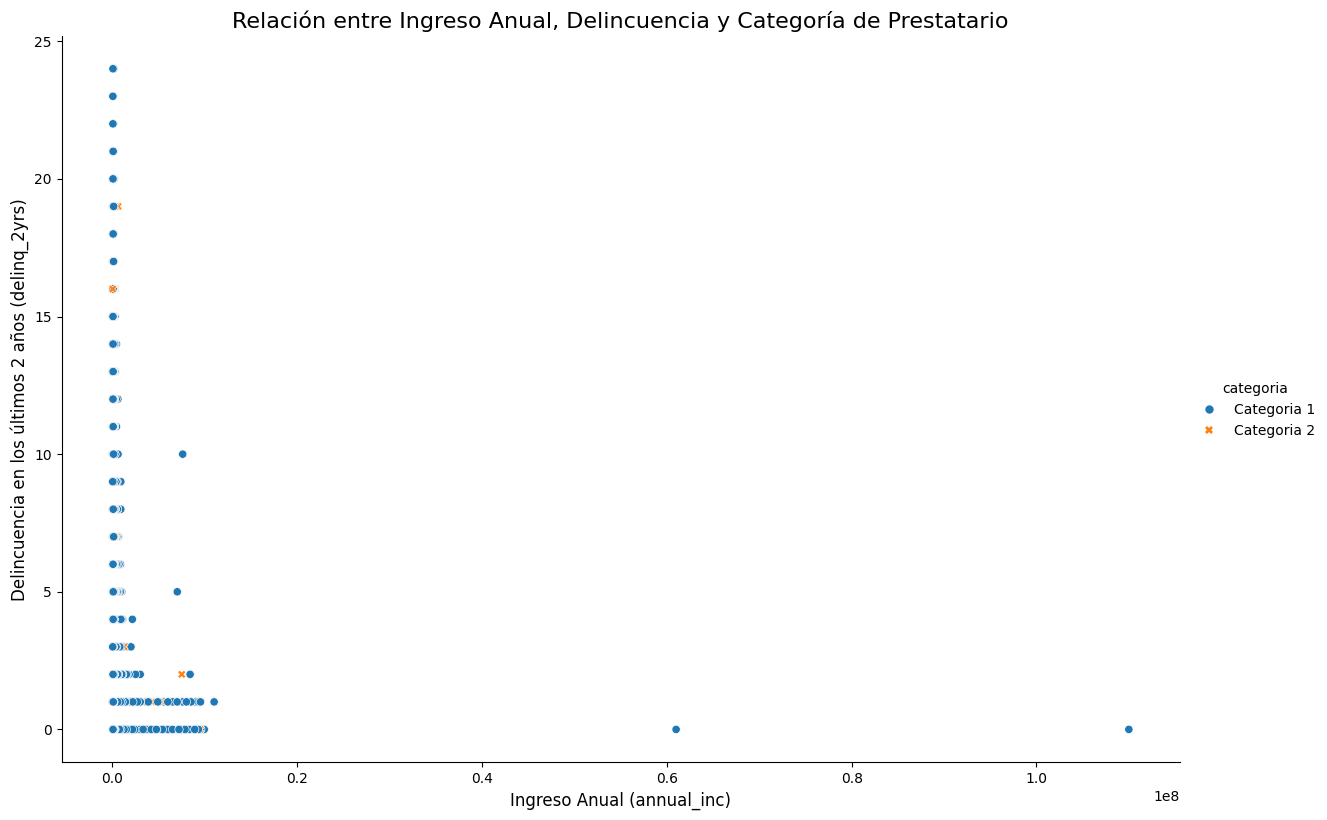

In [60]:
plt.figure(figsize=(12, 8))  # Increased figure size
sns.relplot(x="annual_inc", y="delinq_2yrs", hue="categoria", style="categoria", data=data, height=8, aspect=1.5) # Increased height and aspect
plt.title('Relación entre Ingreso Anual, Delincuencia y Categoría de Prestatario', fontsize=16) # Added title
plt.xlabel('Ingreso Anual (annual_inc)', fontsize=12) #Added xlabel
plt.ylabel('Delincuencia en los últimos 2 años (delinq_2yrs)', fontsize=12) # Added ylabel
plt.xticks(fontsize=10) # Increased fontsize of xticks
plt.yticks(fontsize=10) # Increased fontsize of yticks
plt.show()

Como podemos visualizar en la imagen, en los prestamos realizados, tenemos mayor cantidad de clientes individuales que llegan a caer varios días en mora.

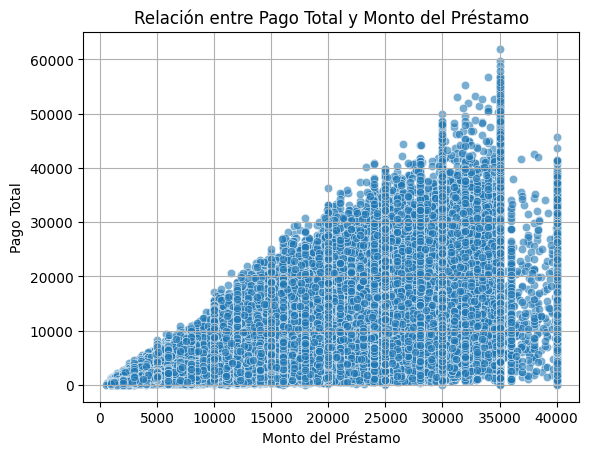

In [50]:

sns.scatterplot(x="loan_amnt", y="total_pymnt", data=malospagadores, alpha=0.6)
plt.title("Relación entre Pago Total y Monto del Préstamo")
plt.xlabel("Monto del Préstamo")
plt.ylabel("Pago Total")
plt.grid()
plt.show()

In [45]:
correlation_coefficient, p_value = pearsonr(data['loan_amnt'], data['installment'])

print(f"Correlation coefficient between loan_amnt and installment: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient between loan_amnt and installment: 0.9456247134839696
P-value: 0.0


<Figure size 1500x1000 with 0 Axes>

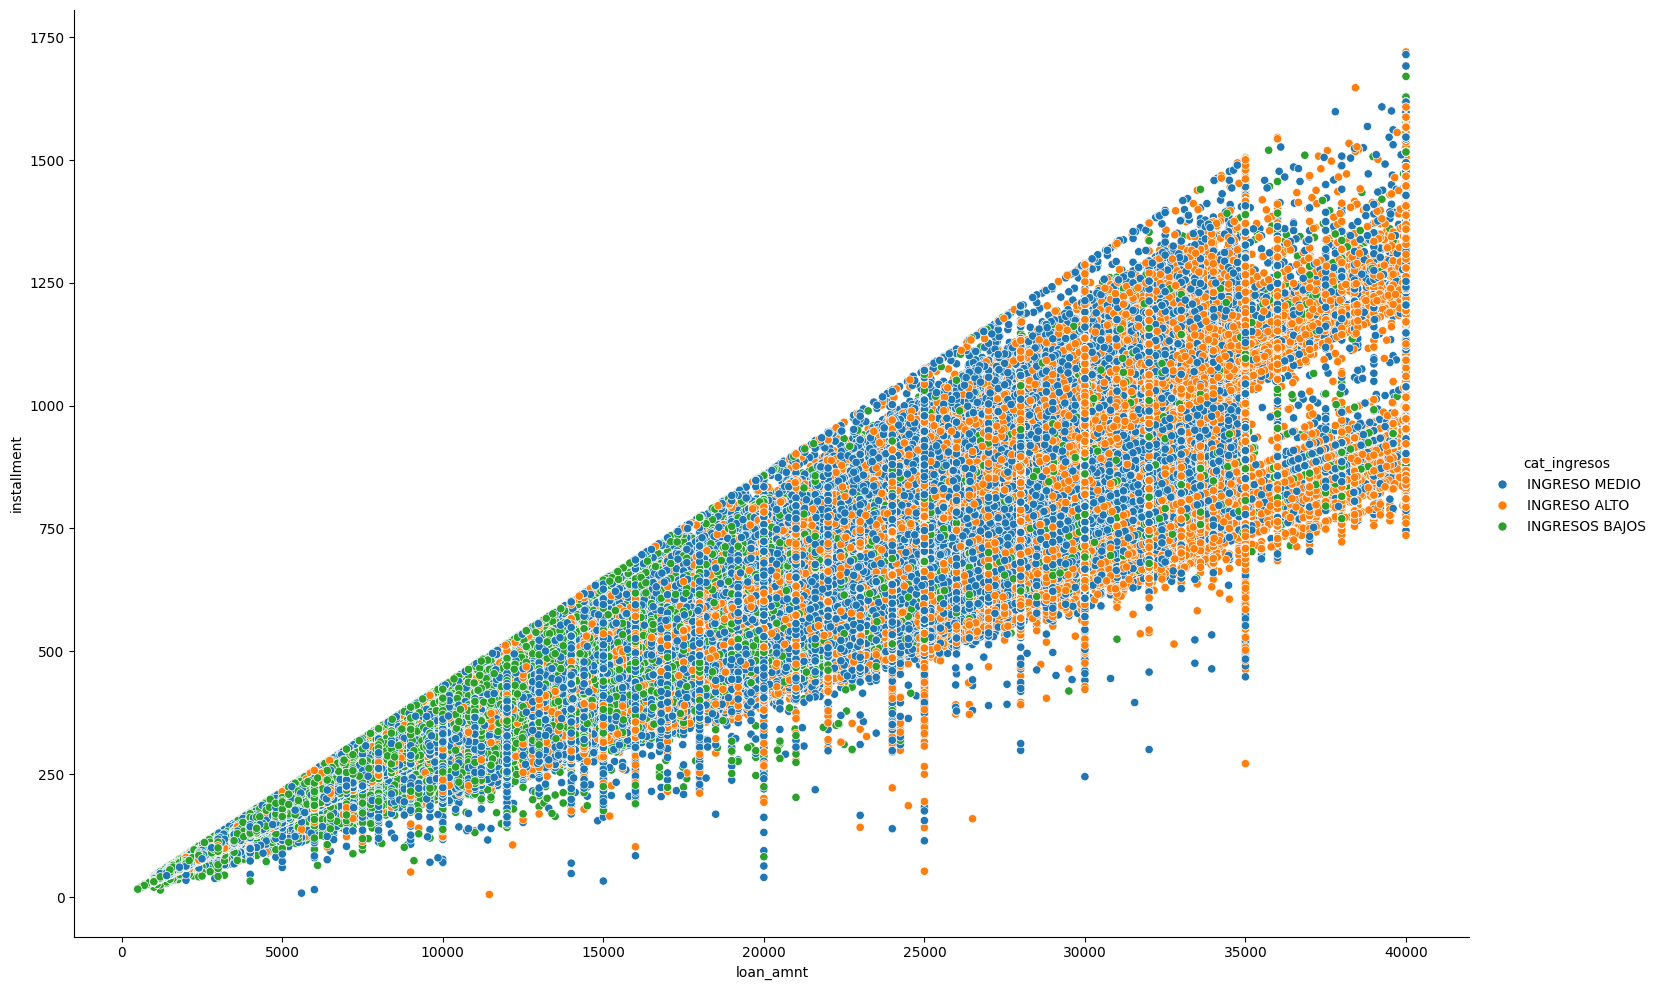

In [56]:

plt.figure(figsize=(15, 10)) # increase figure size
sns.relplot(x="loan_amnt", y="installment", hue="cat_ingresos", data=data, height=10, aspect=1.5) # set height and aspect for better visualization
plt.show()